In [1]:

import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

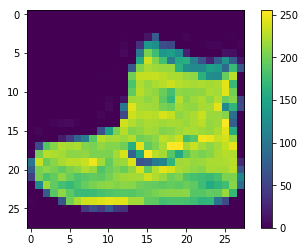

In [10]:
plt.figure()
plt.imshow(train_images[0])

plt.colorbar()
plt.grid(False)

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

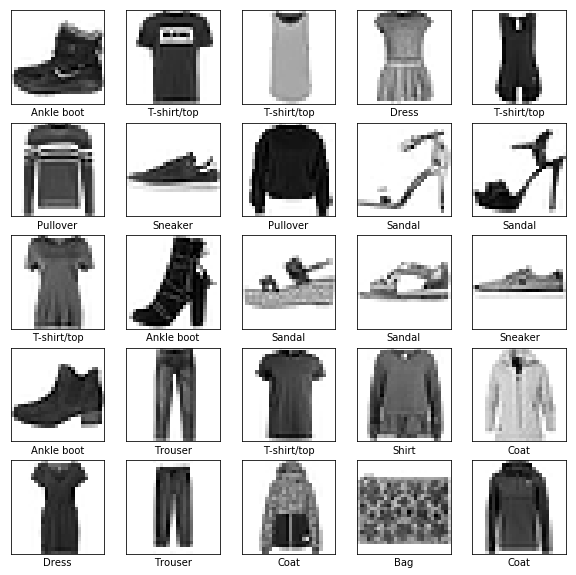

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
NAME = "Tensorflow-CNN-2"
tensorboard = keras.callbacks.TensorBoard(log_dir="logs/{}".format(NAME))

model.fit(train_images, train_labels, epochs=5, callbacks = [tensorboard])

Epoch 1/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.4985 - acc: 0.8255
Epoch 2/5
60000/60000 [==============================] - 144s 2ms/step - loss: 0.3777 - acc: 0.8649
Epoch 3/5
 8448/60000 [===>..........................] - ETA: 1:54 - loss: 0.3395 - acc: 0.8725WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.127510). Check your callbacks.


60000/60000 [==============================] - 135s 2ms/step - loss: 0.3388 - acc: 0.8767
Epoch 4/5
16352/60000 [=======>......................] - ETA: 1:40 - loss: 0.3118 - acc: 0.8830WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.141309). Check your callbacks.


50848/60000 [========================>.....] - ETA: 20s - loss: 0.3133 - acc: 0.8844WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.110282). Check your callbacks.


60000/60000 [==============================] - 138s 2ms/step - loss: 0.3131 - acc: 0.8845
Epoch 5/5
28416/60000 [=============>................] - ETA: 1:09 - loss: 0.2946 - acc: 0.8903WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.116829). Check your callbacks.


39776/60000 [==================>...........] - ETA: 44s - loss: 0.2915 - acc: 0.8910WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.132591). Check your callbacks.


51872/60000 [========================>.....] - ETA: 17s - loss: 0.2932 - acc: 0.8912WARNING:tensorflow:Method on_batch_end() is slow compared to the batch update (0.116314). Check your callbacks.


60000/60000 [==============================] - 126s 2ms/step - loss: 0.2947 - acc: 0.8910


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 46us/step
Test accuracy: 0.8706


In [24]:
predictions = model.predict(test_images)

In [25]:
predictions[0]

array([8.2585968e-05, 3.2547013e-07, 1.8763883e-05, 1.4233857e-06,
       6.6549563e-07, 2.1259680e-03, 2.6232266e-05, 7.9935685e-02,
       1.3508218e-04, 9.1767323e-01], dtype=float32)

In [26]:
np.argmax(predictions[0])

9

In [27]:
test_labels[0]

9

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [32]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

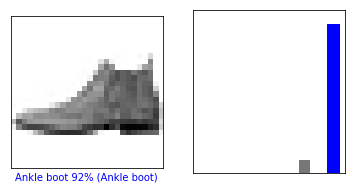

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

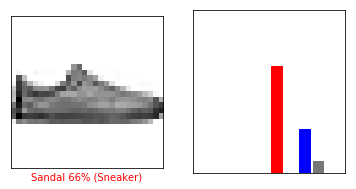

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

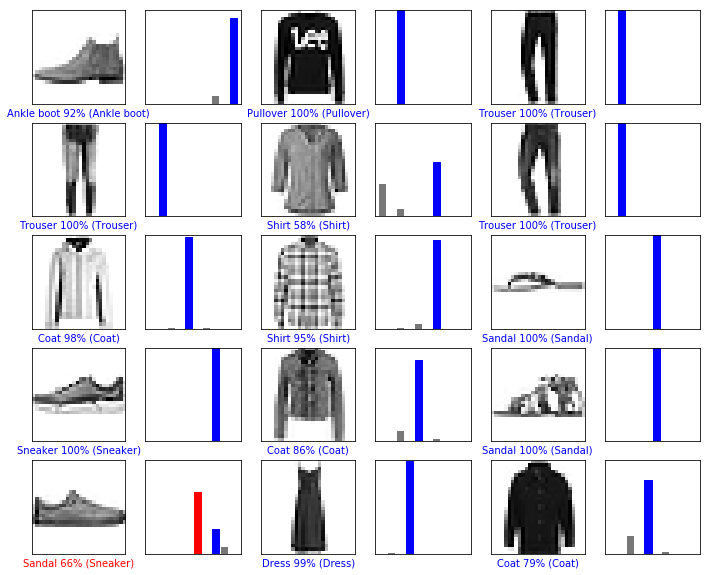

In [33]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [34]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [35]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


[[8.2585968e-05 3.2547013e-07 1.8763883e-05 1.4233912e-06 6.6549563e-07
  2.1259692e-03 2.6232266e-05 7.9935700e-02 1.3508243e-04 9.1767323e-01]]


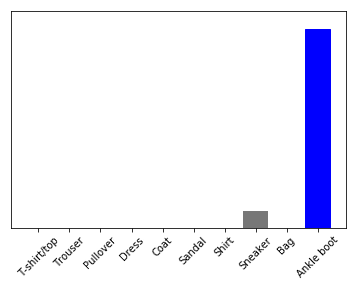

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [38]:
np.argmax(predictions_single[0])

9